
# EDA and Feature Engineering on "Flight Price" dataset

### Importing required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_excel("flight_price.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


## Feature Engineering
The Aim is to convert cols into numerical data, and converting the categorical data to numerical data (because models can take,learn  only numerical data )
Splitting the date into "Day" ,"Month" , "Year" 

In [6]:
df["Day"]=df["Date_of_Journey"].str.split("/").str[0]
df["Month"]=df["Date_of_Journey"].str.split("/").str[1]
df["Year"]=df["Date_of_Journey"].str.split("/").str[2]

### converting into int datatype

In [7]:
df["Day"]=df["Day"].astype(int)

In [8]:
df["Month"]=df["Month"].astype(int)

In [9]:
df["Year"]=df["Year"].astype(int)

In [10]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
 11  Day              10683 non-null  int32 
 12  Month            10683 non-null  int32 
 13  Year             10683 non-null  int32 
dtypes: int32(3), int64(1), object(10)
memory usage: 1.0+ MB


### dropping unnecessary col

In [12]:
df.drop("Date_of_Journey",axis=1,inplace=True)

In [13]:
df

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,2019
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,2019
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,2019
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107,9,4,2019
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145,27,4,2019
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229,27,4,2019
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648,1,3,2019


## Separating Hours and Time

In [14]:
df["Arrival_Hours"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[0]
df["Arrival_Minutes"]=df["Arrival_Time"].str.split(" ").str[0].str.split(":").str[1]


In [15]:
df.head(2)

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,2019,01,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,2019,13,15


In [16]:
df["Arrival_Minutes"]=df["Arrival_Minutes"].astype(int)

In [17]:
df["Arrival_Hours"]=df["Arrival_Hours"].astype(int)

In [18]:
df.drop("Arrival_Time",axis=1,inplace=True)


In [19]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Source           10683 non-null  object
 2   Destination      10683 non-null  object
 3   Route            10682 non-null  object
 4   Dep_Time         10683 non-null  object
 5   Duration         10683 non-null  object
 6   Total_Stops      10682 non-null  object
 7   Additional_Info  10683 non-null  object
 8   Price            10683 non-null  int64 
 9   Day              10683 non-null  int32 
 10  Month            10683 non-null  int32 
 11  Year             10683 non-null  int32 
 12  Arrival_Hours    10683 non-null  int32 
 13  Arrival_Minutes  10683 non-null  int32 
dtypes: int32(5), int64(1), object(8)
memory usage: 959.9+ KB


In [21]:
df

,Airline,Source,Destination,Route,Dep_Time,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,2h 50m,non-stop,No info,3897,24,3,2019,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,7h 25m,2 stops,No info,7662,1,5,2019,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,19h,2 stops,No info,13882,9,6,2019,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,5h 25m,1 stop,No info,6218,12,5,2019,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,4h 45m,1 stop,No info,13302,1,3,2019,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,19:55,2h 30m,non-stop,No info,4107,9,4,2019,22,25
10679,Air India,Kolkata,Banglore,CCU → BLR,20:45,2h 35m,non-stop,No info,4145,27,4,2019,23,20
10680,Jet Airways,Banglore,Delhi,BLR → DEL,08:20,3h,non-stop,No info,7229,27,4,2019,11,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,11:30,2h 40m,non-stop,No info,12648,1,3,2019,14,10


In [22]:
df["Dept_Hours"]=df["Dep_Time"].str.split(" ").str[0].str.split(":").str[0]
df["Dept_Minutes"]=df["Dep_Time"].str.split(" ").str[0].str.split(":").str[1]


In [23]:
df.drop("Dep_Time",axis=1,inplace=True)

In [24]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,09,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,11,20,08,20
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30


In [25]:
df["Duration_Hours"]=df["Duration"].str.split(" ").str[0].str.split("h").str[0]
df["Duration_Minute"]=df["Duration"].str.split(" ").str[1].str.split("m").str[0]

In [26]:
df

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,2019,4,25,09,25,19,NaN
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,CCU → BLR,2h 30m,non-stop,No info,4107,9,4,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,CCU → BLR,2h 35m,non-stop,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,BLR → DEL,3h,non-stop,No info,7229,27,4,2019,11,20,08,20,3,NaN
10681,Vistara,Banglore,New Delhi,BLR → DEL,2h 40m,non-stop,No info,12648,1,3,2019,14,10,11,30,2,40


In [27]:
df.drop(["Route","Duration"],axis=1,inplace=True)

In [28]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,09,25,19,NaN
3,IndiGo,Kolkata,Banglore,1 stop,No info,6218,12,5,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,1 stop,No info,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,No info,4107,9,4,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,non-stop,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,No info,7229,27,4,2019,11,20,08,20,3,NaN
10681,Vistara,Banglore,New Delhi,non-stop,No info,12648,1,3,2019,14,10,11,30,2,40


In [29]:
df["Duration_Minute"]=df["Duration_Minute"].fillna(0)

In [30]:
df.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,IndiGo,Banglore,New Delhi,non-stop,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2 stops,No info,7662,1,5,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,2 stops,No info,13882,9,6,2019,4,25,09,25,19,0


In [31]:
df["Total_Stops"].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

In [32]:
df["Total_Stops"]=df["Total_Stops"].map({"non-stop":0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4,np.nan:1})

In [33]:
df.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,09,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45


In [34]:
df.head(2)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,05,50,7,25


In [35]:
df["Additional_Info"].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [36]:
df["Airline"].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [37]:
df["Source"].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [38]:
df["Destination"].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [39]:
from sklearn.preprocessing import OneHotEncoder

In [40]:
encoder=OneHotEncoder()

In [41]:
encoded=encoder.fit_transform(df[["Airline","Source","Destination"]]).toarray()

In [42]:
data=pd.DataFrame(encoded,columns=encoder.get_feature_names_out())

In [43]:
data

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [44]:
type(data)

pandas.core.frame.DataFrame

In [45]:
type(df)

pandas.core.frame.DataFrame

In [46]:
frames=[df,data]
df_copy=pd.concat(frames)

In [47]:
df_copy

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0.0,No info,3897.0,24.0,3.0,2019.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Air India,Kolkata,Banglore,2.0,No info,7662.0,1.0,5.0,2019.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Jet Airways,Delhi,Cochin,2.0,No info,13882.0,9.0,6.0,2019.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,IndiGo,Kolkata,Banglore,1.0,No info,6218.0,12.0,5.0,2019.0,23.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,IndiGo,Banglore,New Delhi,1.0,No info,13302.0,1.0,3.0,2019.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [48]:
data

,Airline_Air Asia,Airline_Air India,Airline_GoAir,Airline_IndiGo,Airline_Jet Airways,Airline_Jet Airways Business,Airline_Multiple carriers,Airline_Multiple carriers Premium economy,Airline_SpiceJet,Airline_Trujet,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10679,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
10680,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
10681,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [49]:
df

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,10,22,20,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,15,05,50,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,25,09,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,30,18,05,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,35,16,50,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,0,No info,4107,9,4,2019,22,25,19,55,2,30
10679,Air India,Kolkata,Banglore,0,No info,4145,27,4,2019,23,20,20,45,2,35
10680,Jet Airways,Banglore,Delhi,0,No info,7229,27,4,2019,11,20,08,20,3,0
10681,Vistara,Banglore,New Delhi,0,No info,12648,1,3,2019,14,10,11,30,2,40


In [50]:
final_data=pd.concat([df,data],axis=1)

In [51]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Source                                     10683 non-null  object 
 2   Destination                                10683 non-null  object 
 3   Total_Stops                                10683 non-null  int64  
 4   Additional_Info                            10683 non-null  object 
 5   Price                                      10683 non-null  int64  
 6   Day                                        10683 non-null  int32  
 7   Month                                      10683 non-null  int32  
 8   Year                                       10683 non-null  int32  
 9   Arrival_Hours                              10683 non-null  int32  
 10  Arrival_Minutes       

In [52]:
#final_data["Duration_Hours"]=final_data["Duration_Hours"].astype(int)

In [53]:
filtered_data = final_data[final_data["Duration_Hours"] == '5m']


In [54]:
filtered_data

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
6474,Air India,Mumbai,Hyderabad,2,No info,17327,6,3,2019,16,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0


In [55]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Source                                     10683 non-null  object 
 2   Destination                                10683 non-null  object 
 3   Total_Stops                                10683 non-null  int64  
 4   Additional_Info                            10683 non-null  object 
 5   Price                                      10683 non-null  int64  
 6   Day                                        10683 non-null  int32  
 7   Month                                      10683 non-null  int32  
 8   Year                                       10683 non-null  int32  
 9   Arrival_Hours                              10683 non-null  int32  
 10  Arrival_Minutes       

In [56]:
final_data["Duration_Hours"]=final_data["Duration_Hours"].replace("5m",0).astype(int)

In [57]:
obj=[x for x in final_data.columns if final_data[x].dtype=="O"]

In [58]:
obj

['Airline',
 'Source',
 'Destination',
 'Additional_Info',
 'Dept_Hours',
 'Dept_Minutes',
 'Duration_Minute']

In [59]:
final_data['Dept_Hours']=final_data['Dept_Hours'].astype(int)

In [60]:
final_data['Duration_Minute']=final_data['Duration_Minute'].astype(int)

In [61]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Source                                     10683 non-null  object 
 2   Destination                                10683 non-null  object 
 3   Total_Stops                                10683 non-null  int64  
 4   Additional_Info                            10683 non-null  object 
 5   Price                                      10683 non-null  int64  
 6   Day                                        10683 non-null  int32  
 7   Month                                      10683 non-null  int32  
 8   Year                                       10683 non-null  int32  
 9   Arrival_Hours                              10683 non-null  int32  
 10  Arrival_Minutes       

In [62]:
final_data["Dept_Minutes"]=final_data["Duration_Minute"].astype(int)

In [63]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 38 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Airline                                    10683 non-null  object 
 1   Source                                     10683 non-null  object 
 2   Destination                                10683 non-null  object 
 3   Total_Stops                                10683 non-null  int64  
 4   Additional_Info                            10683 non-null  object 
 5   Price                                      10683 non-null  int64  
 6   Day                                        10683 non-null  int32  
 7   Month                                      10683 non-null  int32  
 8   Year                                       10683 non-null  int32  
 9   Arrival_Hours                              10683 non-null  int32  
 10  Arrival_Minutes       

In [64]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [65]:
final_data.isnull().sum()

Airline                                      0
Source                                       0
Destination                                  0
Total_Stops                                  0
Additional_Info                              0
Price                                        0
Day                                          0
Month                                        0
Year                                         0
Arrival_Hours                                0
Arrival_Minutes                              0
Dept_Hours                                   0
Dept_Minutes                                 0
Duration_Hours                               0
Duration_Minute                              0
Airline_Air Asia                             0
Airline_Air India                            0
Airline_GoAir                                0
Airline_IndiGo                               0
Airline_Jet Airways                          0
Airline_Jet Airways Business                 0
Airline_Multi

## Using labelEncoder from sklearn :- assigns unique integer to each category...

In [66]:
from sklearn.preprocessing import LabelEncoder

In [67]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,2019,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,2019,13,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,2019,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,2019,23,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,2019,21,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [68]:
encoder=LabelEncoder()

In [69]:
final_data["Airline"]=encoder.fit_transform(final_data["Airline"])
final_data["Source"]=encoder.fit_transform(final_data["Source"])
final_data["Destination"]=encoder.fit_transform(final_data["Destination"])
final_data["Additional_Info"]=encoder.fit_transform(final_data["Additional_Info"])

In [70]:
final_data.head(3)

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,...,Source_Chennai,Source_Delhi,Source_Kolkata,Source_Mumbai,Destination_Banglore,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,3,0,5,0,8,3897,24,3,2019,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3,0,2,8,7662,1,5,2019,13,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,4,2,1,2,8,13882,9,6,2019,4,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [71]:
final_data["Airline"].unique()

array([ 3,  1,  4,  8,  6,  2, 10,  0, 11,  5,  7,  9])

In [72]:
obj=[x for x in final_data.columns if final_data[x].dtype=="float"]

In [73]:
obj

['Airline_Air Asia',
 'Airline_Air India',
 'Airline_GoAir',
 'Airline_IndiGo',
 'Airline_Jet Airways',
 'Airline_Jet Airways Business',
 'Airline_Multiple carriers',
 'Airline_Multiple carriers Premium economy',
 'Airline_SpiceJet',
 'Airline_Trujet',
 'Airline_Vistara',
 'Airline_Vistara Premium economy',
 'Source_Banglore',
 'Source_Chennai',
 'Source_Delhi',
 'Source_Kolkata',
 'Source_Mumbai',
 'Destination_Banglore',
 'Destination_Cochin',
 'Destination_Delhi',
 'Destination_Hyderabad',
 'Destination_Kolkata',
 'Destination_New Delhi']

In [74]:
for i in obj:
    final_data.drop(i,axis=1,inplace=True)

### We have successfully converted the data into numerical data which is super ready for input to the model.  Dataset is now in a format that is ready to be used for training and testing machine learning models.

In [75]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,3,0,5,0,8,3897,24,3,2019,1,10,22,50,2,50
1,1,3,0,2,8,7662,1,5,2019,13,15,5,25,7,25
2,4,2,1,2,8,13882,9,6,2019,4,25,9,0,19,0
3,3,3,0,1,8,6218,12,5,2019,23,30,18,25,5,25
4,3,0,5,1,8,13302,1,3,2019,21,35,16,45,4,45


In [76]:
final_data["Additional_Info"].unique()

array([8, 5, 7, 1, 6, 0, 4, 3, 9, 2])

In [ ]:
final_data["Airline"].value_counts()

# Next Step:- Data Visualization 
visualizing the dataset to gain insights, identify patterns, and better understand the relationships between different features. Data visualization is an essential part of the exploratory data analysis (EDA) process.

<Axes: xlabel='Airline'>

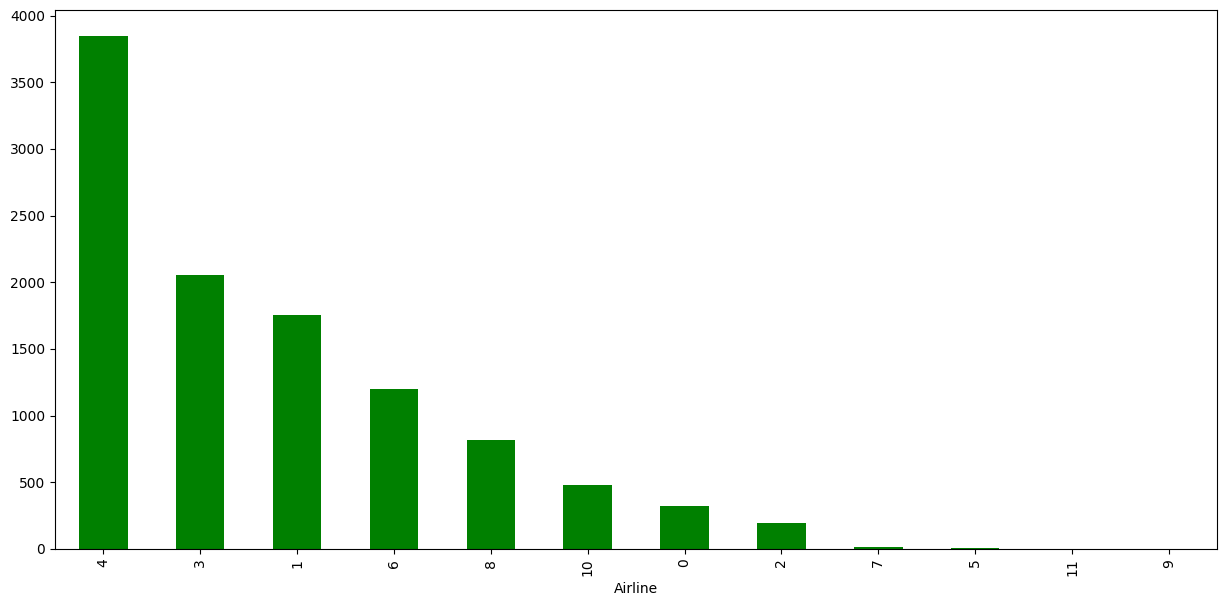

In [78]:
plt.figure(figsize=[15,7])
final_data["Airline"].value_counts().plot(kind="bar",color="green")

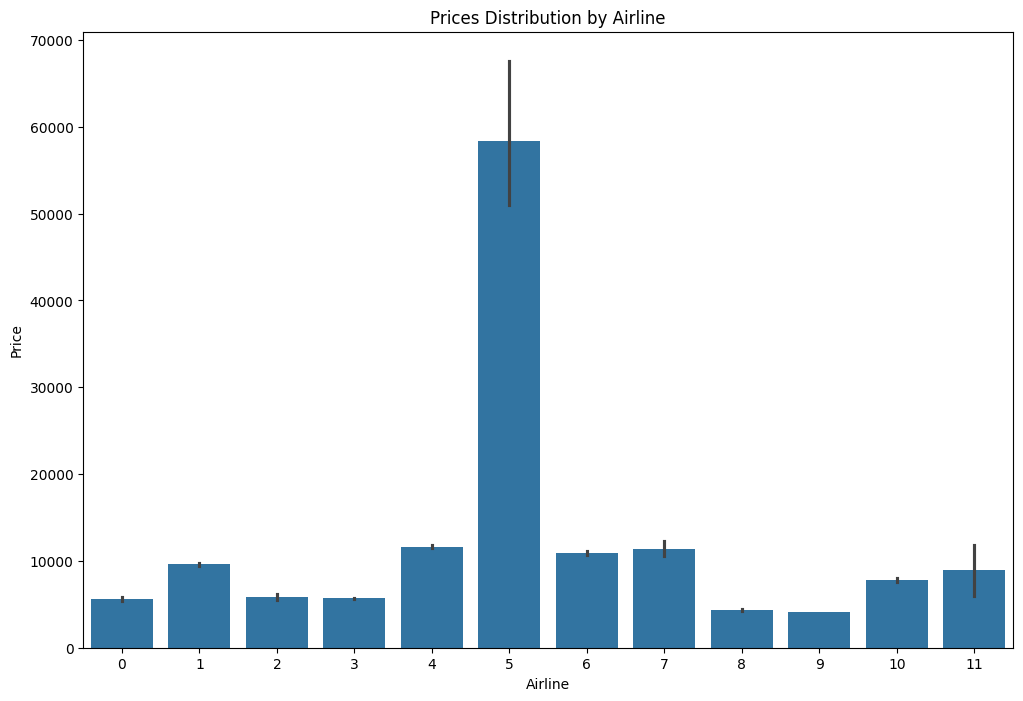

In [79]:
plt.figure(figsize=(12, 8))
# avg_prices = final_data.groupby('Airline')['Price'].mean()
sns.barplot(x='Airline', y='Price', data=final_data)
plt.title('Prices Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

In [80]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,3,0,5,0,8,3897,24,3,2019,1,10,22,50,2,50
1,1,3,0,2,8,7662,1,5,2019,13,15,5,25,7,25
2,4,2,1,2,8,13882,9,6,2019,4,25,9,0,19,0
3,3,3,0,1,8,6218,12,5,2019,23,30,18,25,5,25
4,3,0,5,1,8,13302,1,3,2019,21,35,16,45,4,45


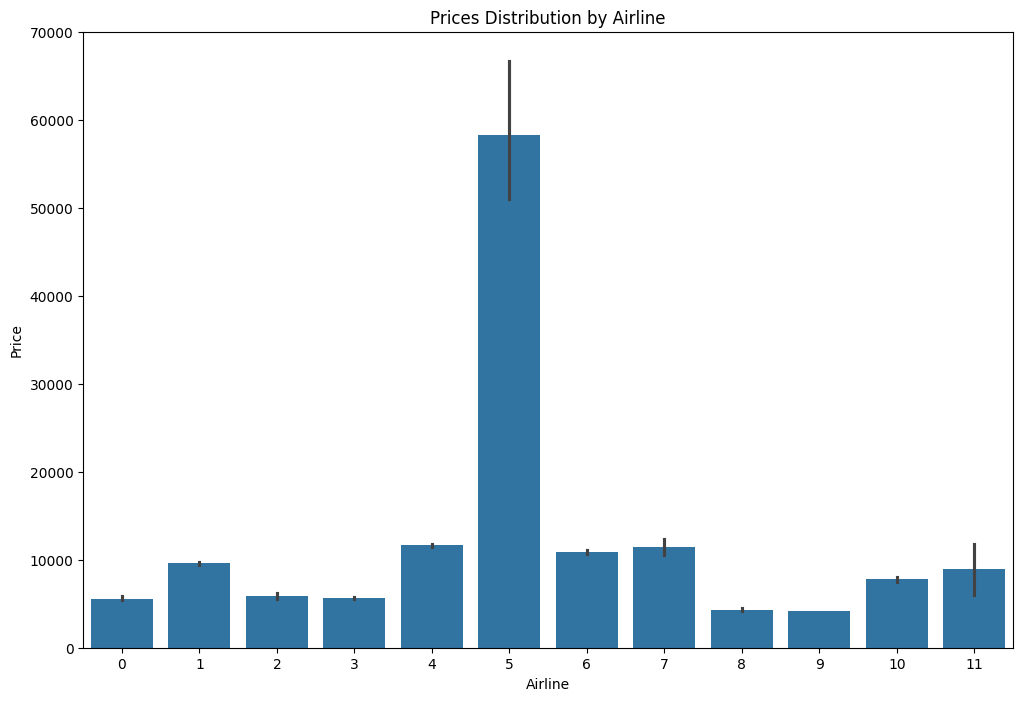

In [81]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Airline', y='Price', data=final_data)
plt.title('Prices Distribution by Airline')
plt.xlabel('Airline')
plt.ylabel('Price')
plt.show()

In [97]:
total_prices=final_data.groupby('Month')['Price'].sum()

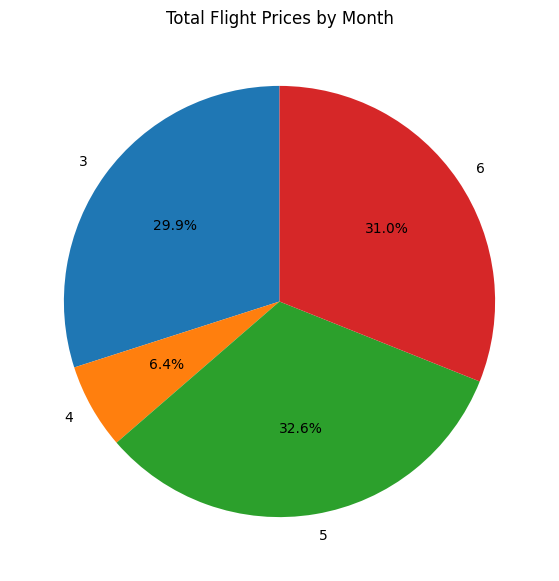

In [106]:
plt.figure(figsize=(15,7))
plt.pie(total_prices,labels=total_prices.index,autopct='%1.1f%%', startangle=90)
plt.title('Total Flight Prices by Month')
plt.show()

In [107]:
final_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Day,Month,Year,Arrival_Hours,Arrival_Minutes,Dept_Hours,Dept_Minutes,Duration_Hours,Duration_Minute
0,3,0,5,0,8,3897,24,3,2019,1,10,22,50,2,50
1,1,3,0,2,8,7662,1,5,2019,13,15,5,25,7,25
2,4,2,1,2,8,13882,9,6,2019,4,25,9,0,19,0
3,3,3,0,1,8,6218,12,5,2019,23,30,18,25,5,25
4,3,0,5,1,8,13302,1,3,2019,21,35,16,45,4,45


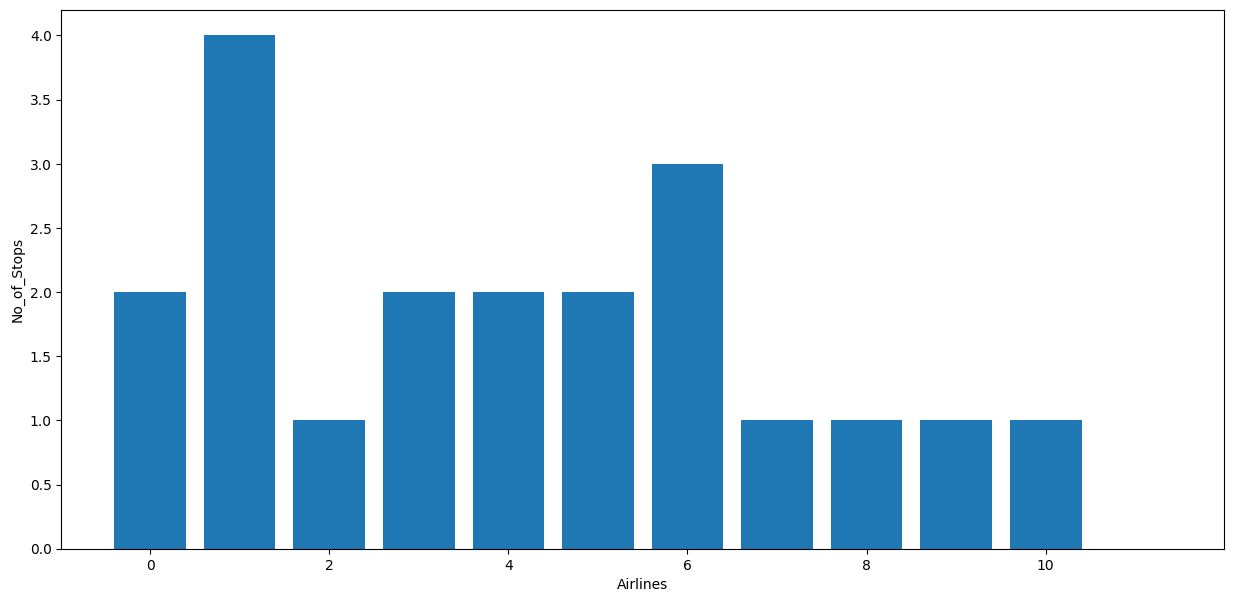

In [116]:
airlines=final_data["Airline"]
stop=final_data["Total_Stops"]
plt.figure(figsize=[15,7])
plt.bar(airlines, stop)
plt.xlabel("Airlines")
plt.ylabel("No_of_Stops")
plt.show()